In [ ]:
# The code was removed by Watson Studio for sharing.

In [2]:
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np

print("Libraries imported.")

Libraries imported.


import the link

In [49]:

data = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(data, 'lxml')


create elemeent for dataframe

In [10]:

postalcode = []
Borough = [] 
Neighborhood = []

paste content into dataframe

In [11]:

for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if(len(cells) > 0):
        postalcode.append(cells[0].text.rstrip('\n'))
        Borough.append(cells[1].text.rstrip('\n'))
        Neighborhood.append(cells[2].text.rstrip('\n'))

In [26]:
to_df = pd.DataFrame({"Postal Code": postalcode,
                      "Borough": Borough,
                      "Neighborhood": Neighborhood})
to_df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


delete column has Not assigned value 

In [42]:


to_df = to_df[to_df != 'Not assigned']
to_df

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


combine cell with the same content 

In [43]:


to_df.groupby(['Postal Code','Borough'])['Neighborhood'].apply(','.join).reset_index()
to_df.head()

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [44]:
to_df.shape

(103, 3)

In [52]:
!pip install geocoder
!pip install folium
import geocoder # import geocoder
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium

In [66]:
# The code was removed by Watson Studio for sharing.

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [68]:
to2_df = pd.merge(to_df, coordinates, on = 'Postal Code')
to2_df

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [80]:
to2_df.loc[to2_df['Postal Code'].isin(["M5G", "M2H", "M4B", "M1J", "M4G", "M4M", "M1R", "M9V", "M9L", "M5V", "M1B", "M5A"])]



,Postal Code,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
23,M4G,East York,Leaside,43.709060,-79.363452
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
27,M2H,North York,Hillcrest Village,43.803762,-79.363452
32,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
50,M9L,North York,Humber Summit,43.756303,-79.565963
54,M4M,East Toronto,Studio District,43.659526,-79.340923
71,M1R,Scarborough,"Wexford, Maryvale",43.750072,-79.295849


connect to foursqaure 

In [81]:
CLIENT_ID = 'WK0QSB3S3K1RJELPKCJI0BORNMDDJNFHA4HWAW0YQY0KX0NC' # your Foursquare ID
CLIENT_SECRET = 'HIR04WN5D1FZS5WOI5OFTQKYYZ3VZYSJNKOMFS15ZNYZYUWA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WK0QSB3S3K1RJELPKCJI0BORNMDDJNFHA4HWAW0YQY0KX0NC
CLIENT_SECRET:HIR04WN5D1FZS5WOI5OFTQKYYZ3VZYSJNKOMFS15ZNYZYUWA


define the area to Toronto

In [89]:
to3_df=to2_df.loc[to2_df.Borough == 'Downtown Toronto']
to3_df

,Postal Code,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
36,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752
42,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576


In [99]:
neighborhood_latitude = (to3_df.Latitude).mean
neighborhood_latitude

<bound method Series.mean of 2     43.654260
4     43.662301
9     43.657162
15    43.651494
20    43.644771
24    43.657952
25    43.669542
30    43.650571
36    43.640816
42    43.647177
48    43.648198
80    43.662696
84    43.653206
87    43.628947
91    43.679563
92    43.646435
96    43.667967
97    43.648429
99    43.665860
Name: Latitude, dtype: float64>

In [101]:
neighborhood_longitude = (to3_df.Longitude).mean
neighborhood_longitude 

<bound method Series.mean of 2    -79.360636
4    -79.389494
9    -79.378937
15   -79.375418
20   -79.373306
24   -79.387383
25   -79.422564
30   -79.384568
36   -79.381752
42   -79.381576
48   -79.379817
80   -79.400049
84   -79.400049
87   -79.394420
91   -79.377529
92   -79.374846
96   -79.367675
97   -79.382280
99   -79.383160
Name: Longitude, dtype: float64>

get top 100 venues that are in Downtown Toronto within a radius of 500 meters 

In [106]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    43.65, 
    -79.36, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=WK0QSB3S3K1RJELPKCJI0BORNMDDJNFHA4HWAW0YQY0KX0NC&client_secret=HIR04WN5D1FZS5WOI5OFTQKYYZ3VZYSJNKOMFS15ZNYZYUWA&v=20180605&ll=43.65,-79.36&radius=500&limit=100'

make a data frame according to venue's name, location, and category

In [107]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fff965432d7e642f97f5e40'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'The Distillery District',
  'headerFullLocation': 'The Distillery District, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 44,
  'suggestedBounds': {'ne': {'lat': 43.6545000045, 'lng': -79.3537924404724},
   'sw': {'lat': 43.645499995499996, 'lng': -79.3662075595276}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ad4c05ef964a520bff620e3',
       'name': 'The Distillery Historic District',
       'location': {'address': 'btwn Front, Cherry, Gardiner & Parliament',
        'lat': 43.65024435658077,
        'lng': -79.35932278633118,
        

In [115]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [116]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,The Distillery Historic District,Historic Site,43.650244,-79.359323
1,Distillery Sunday Market,Farmers Market,43.650075,-79.361832
2,Arvo,Coffee Shop,43.649963,-79.361442
3,SOMA chocolatemaker,Chocolate Shop,43.650622,-79.358127
4,Balzac's Coffee,Coffee Shop,43.649797,-79.359142


set the cluster 

In [130]:

clustering = nearby_venues.drop(['name','categories'], axis =1)
clustering.head()


,lat,lng
0,43.650244,-79.359323
1,43.650075,-79.361832
2,43.649963,-79.361442
3,43.650622,-79.358127
4,43.649797,-79.359142


In [141]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline 
to = clustering.to_numpy()

kmeans = KMeans(n_clusters=4, random_state=0).fit(to)




In [143]:
k_means_labels = kmeans.labels_
k_means_labels

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 3, 1, 0, 1,
       2, 0, 2, 2, 2, 0, 2, 3, 2, 3, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1],
      dtype=int32)

In [144]:
k_means_cluster_centers = kmeans.cluster_centers_
k_means_cluster_centers

array([[ 43.65070454, -79.35789513],
       [ 43.6488786 , -79.36114657],
       [ 43.65084774, -79.36499263],
       [ 43.65356635, -79.3611751 ]])

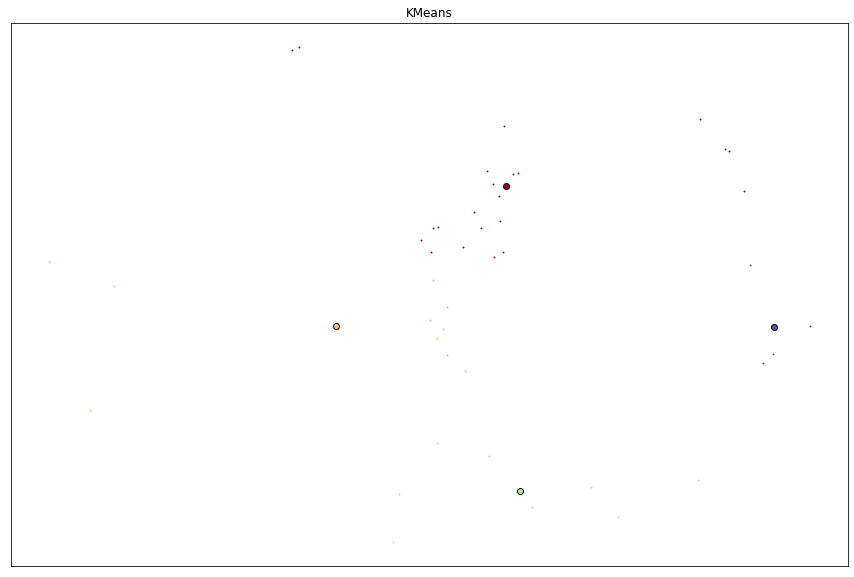

In [146]:
# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(15, 10))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # plot the datapoints with color col.
    ax.plot(to[my_members, 0], to[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# title of the plot
ax.set_title('KMeans')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()